In [20]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [21]:
def rho_green_light (x,rho_light):
    rho = numpy.zeros_like (x)
    mask = numpy.where(x<2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [22]:
# Set parameters.
nx = 81  # number of locations on the road
L = 4.0  # length of the road
dx = L / (nx - 1)  # distance between two consecutive locations
nt = 30  # number of time step to compute
u_max = 1.0  # maximum speed allowed on the road
rho_max = 10.0  # maximum car density allowed on the road
rho_light = 10.0  # car density at the stoplight

# Discretize the road.
x = numpy.linspace(0.0, L, num=nx)

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

In [23]:
def flux (rho, u_max, rho_max):
    F= rho * u_max * (1.0 - rho/ rho_max)
    return F

In [24]:
def ftbs (rho0, nt, dt, dx, bc_value, *args):
    rho_hist= [rho0.copy()]
    rho = rho0.copy()
    for i in range (0,nt):
        F=flux (rho, *args)
        rho [1:]=rho[1:]-dt/dx*(F[1:]-F[:-1])
        rho[0]= bc_value
        rho_hist.append(rho.copy())
    return rho_hist

In [25]:
sigma = 1.0
dt = sigma * dx / u_max
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [28]:
from matplotlib import animation
from IPython.display import HTML, display
import ipywidgets

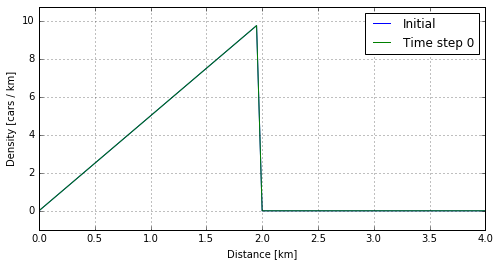

In [29]:
# create a function to plot your solution
def plot_density(n, rho_hist):
    pyplot.figure(figsize=(8.0,4.0))
    pyplot.xlabel('Distance [km]')
    pyplot.ylabel('Density [cars / km]')
    pyplot.grid()
    pyplot.plot(x, rho_hist[0], label='Initial')
    pyplot.plot(x, rho_hist[n], label='Time step {}'.format(n))
    pyplot.ylim(rho_hist[0].min() - 1.0, rho_hist[0].max() + 1.0)
    pyplot.legend()

# create a ipywidgets slider for the time levels
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                description='time step')

# create the ipywidgets interactive figure
w = ipywidgets.interactive(plot_density,
                              n=nt_slider,
                              rho_hist=ipywidgets.fixed(rho_hist))

# display the interactive figure
display(w)

In [30]:
# Modify some parameters.
nt = 40  # number of time step to compute
rho_light = 5.0  # car density at the stoplight

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

In [31]:
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

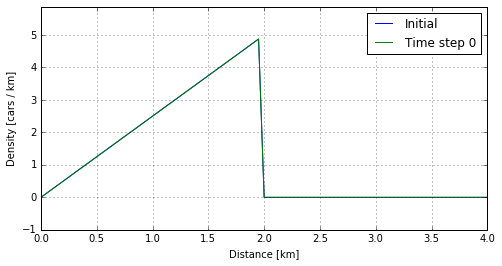

In [32]:
# create a function to plot your solution
def plot_density(n, rho_hist):
    pyplot.figure(figsize=(8.0,4.0))
    pyplot.xlabel('Distance [km]')
    pyplot.ylabel('Density [cars / km]')
    pyplot.grid()
    pyplot.plot(x, rho_hist[0], label='Initial')
    pyplot.plot(x, rho_hist[n], label='Time step {}'.format(n))
    pyplot.ylim(rho_hist[0].min() - 1.0, rho_hist[0].max() + 1.0)
    pyplot.legend()

# create a ipywidgets slider for the time levels
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                description='time step')

# create the ipywidgets interactive figure
w = ipywidgets.interactive(plot_density,
                              n=nt_slider,
                              rho_hist=ipywidgets.fixed(rho_hist))

# display the interactive figure
display(w)

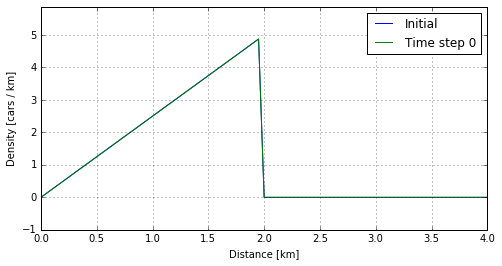

In [33]:
# Modify some parameters.
nt = 40  # number of time step to compute
u_max = 1.1  # car density at the stoplight

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)
# create a function to plot your solution
def plot_density(n, rho_hist):
    pyplot.figure(figsize=(8.0,4.0))
    pyplot.xlabel('Distance [km]')
    pyplot.ylabel('Density [cars / km]')
    pyplot.grid()
    pyplot.plot(x, rho_hist[0], label='Initial')
    pyplot.plot(x, rho_hist[n], label='Time step {}'.format(n))
    pyplot.ylim(rho_hist[0].min() - 1.0, rho_hist[0].max() + 1.0)
    pyplot.legend()

# create a ipywidgets slider for the time levels
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                description='time step')

# create the ipywidgets interactive figure
w = ipywidgets.interactive(plot_density,
                              n=nt_slider,
                              rho_hist=ipywidgets.fixed(rho_hist))

# display the interactive figure
display(w)